## **23.02.06 to make main figure**

In [1]:
from TO_sim.Sol_Kuramoto import *
from TO_sim.gen_Distribution import *
import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
import pandas as pd

from TO_sim.To_Draw import Draw_theoretical_wData as DD
from TO_sim.To_Draw import Draw_theoretical as DDD
from TO_sim.Hysteresis_Kuramoto import Hysteresis_pd_init_pvel as Hp
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

from TO_sim.Utility import *
import parmap

In [2]:
DF = 'Review/23.02.06 to make main figure/'
Create_Folder(DF)
N = 500
dist = 'Normal'
t_end = 200
ss = 10
N = 500
dK = 0.2
dt = 0.1
m = 0
applys = [1]
save = True
ms = [6]
core = [len(ms) if len(ms)<10 else 10][0]
print(core)
# Draw_ = DD(m=m,dist = 'Normal')
df_sets = {}
rdf_sets = {}

for m in ms:
    df,rdf = Hp(m,N=N,t_end=t_end,dist = dist,dt = 0.1,dK=dK, shuffle = True, shuffle_seed = ss+1,Init_dtheta=False,Init_dtheta_seed=applys, seed=10\
                ,second_initial_state = False,Init_dtheta_omega = False)
    df_sets[m] = df
    rdf_sets[m] = rdf

1


In [171]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist}/')
def Draw_Kr(m,ax):
    df = df_sets[m]
    rdf = rdf_sets[m]
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    categories = ['Theoretical', 'Simulated']
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    plt.sca(ax)
    fw,(bw,bwd) = Draw_.total()

    err_fw = plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label=r'Foward($K\uparrow$)')
    err_bw = plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label=r'Backward($K\downarrow$)')
    p5, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
    p7, = plt.plot([0],  marker='None',
           linestyle='None', label='dummy-empty')
    
    leg3 = plt.legend([p5, fw, err_fw, p5, bw, err_bw],
                      [r'Foward($K\uparrow$)'] + categories + [r'Backward($K\downarrow$)'] + categories,
                      loc = 4,ncol=2) # Two columns, vertical group labels
#     leg4 = plt.legend([p5, p7, p5, p7, fw, err_fw, bw, err_bw],
#               [r'Foward($K\uparrow$)', '', r'Backward($K\downarrow$)', ''] + categories + categories,
#               loc=4, ncol=2) # Two columns, horizontal group labels
    
    plt.grid()

    plt.xlim(0,13)
    plt.ylim(0,1)

    plt.xlabel('Coupling constant(K)',fontsize=13)
    plt.ylabel('Order parameter(r)',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)

$K\uparrow$
$K\downarrow$

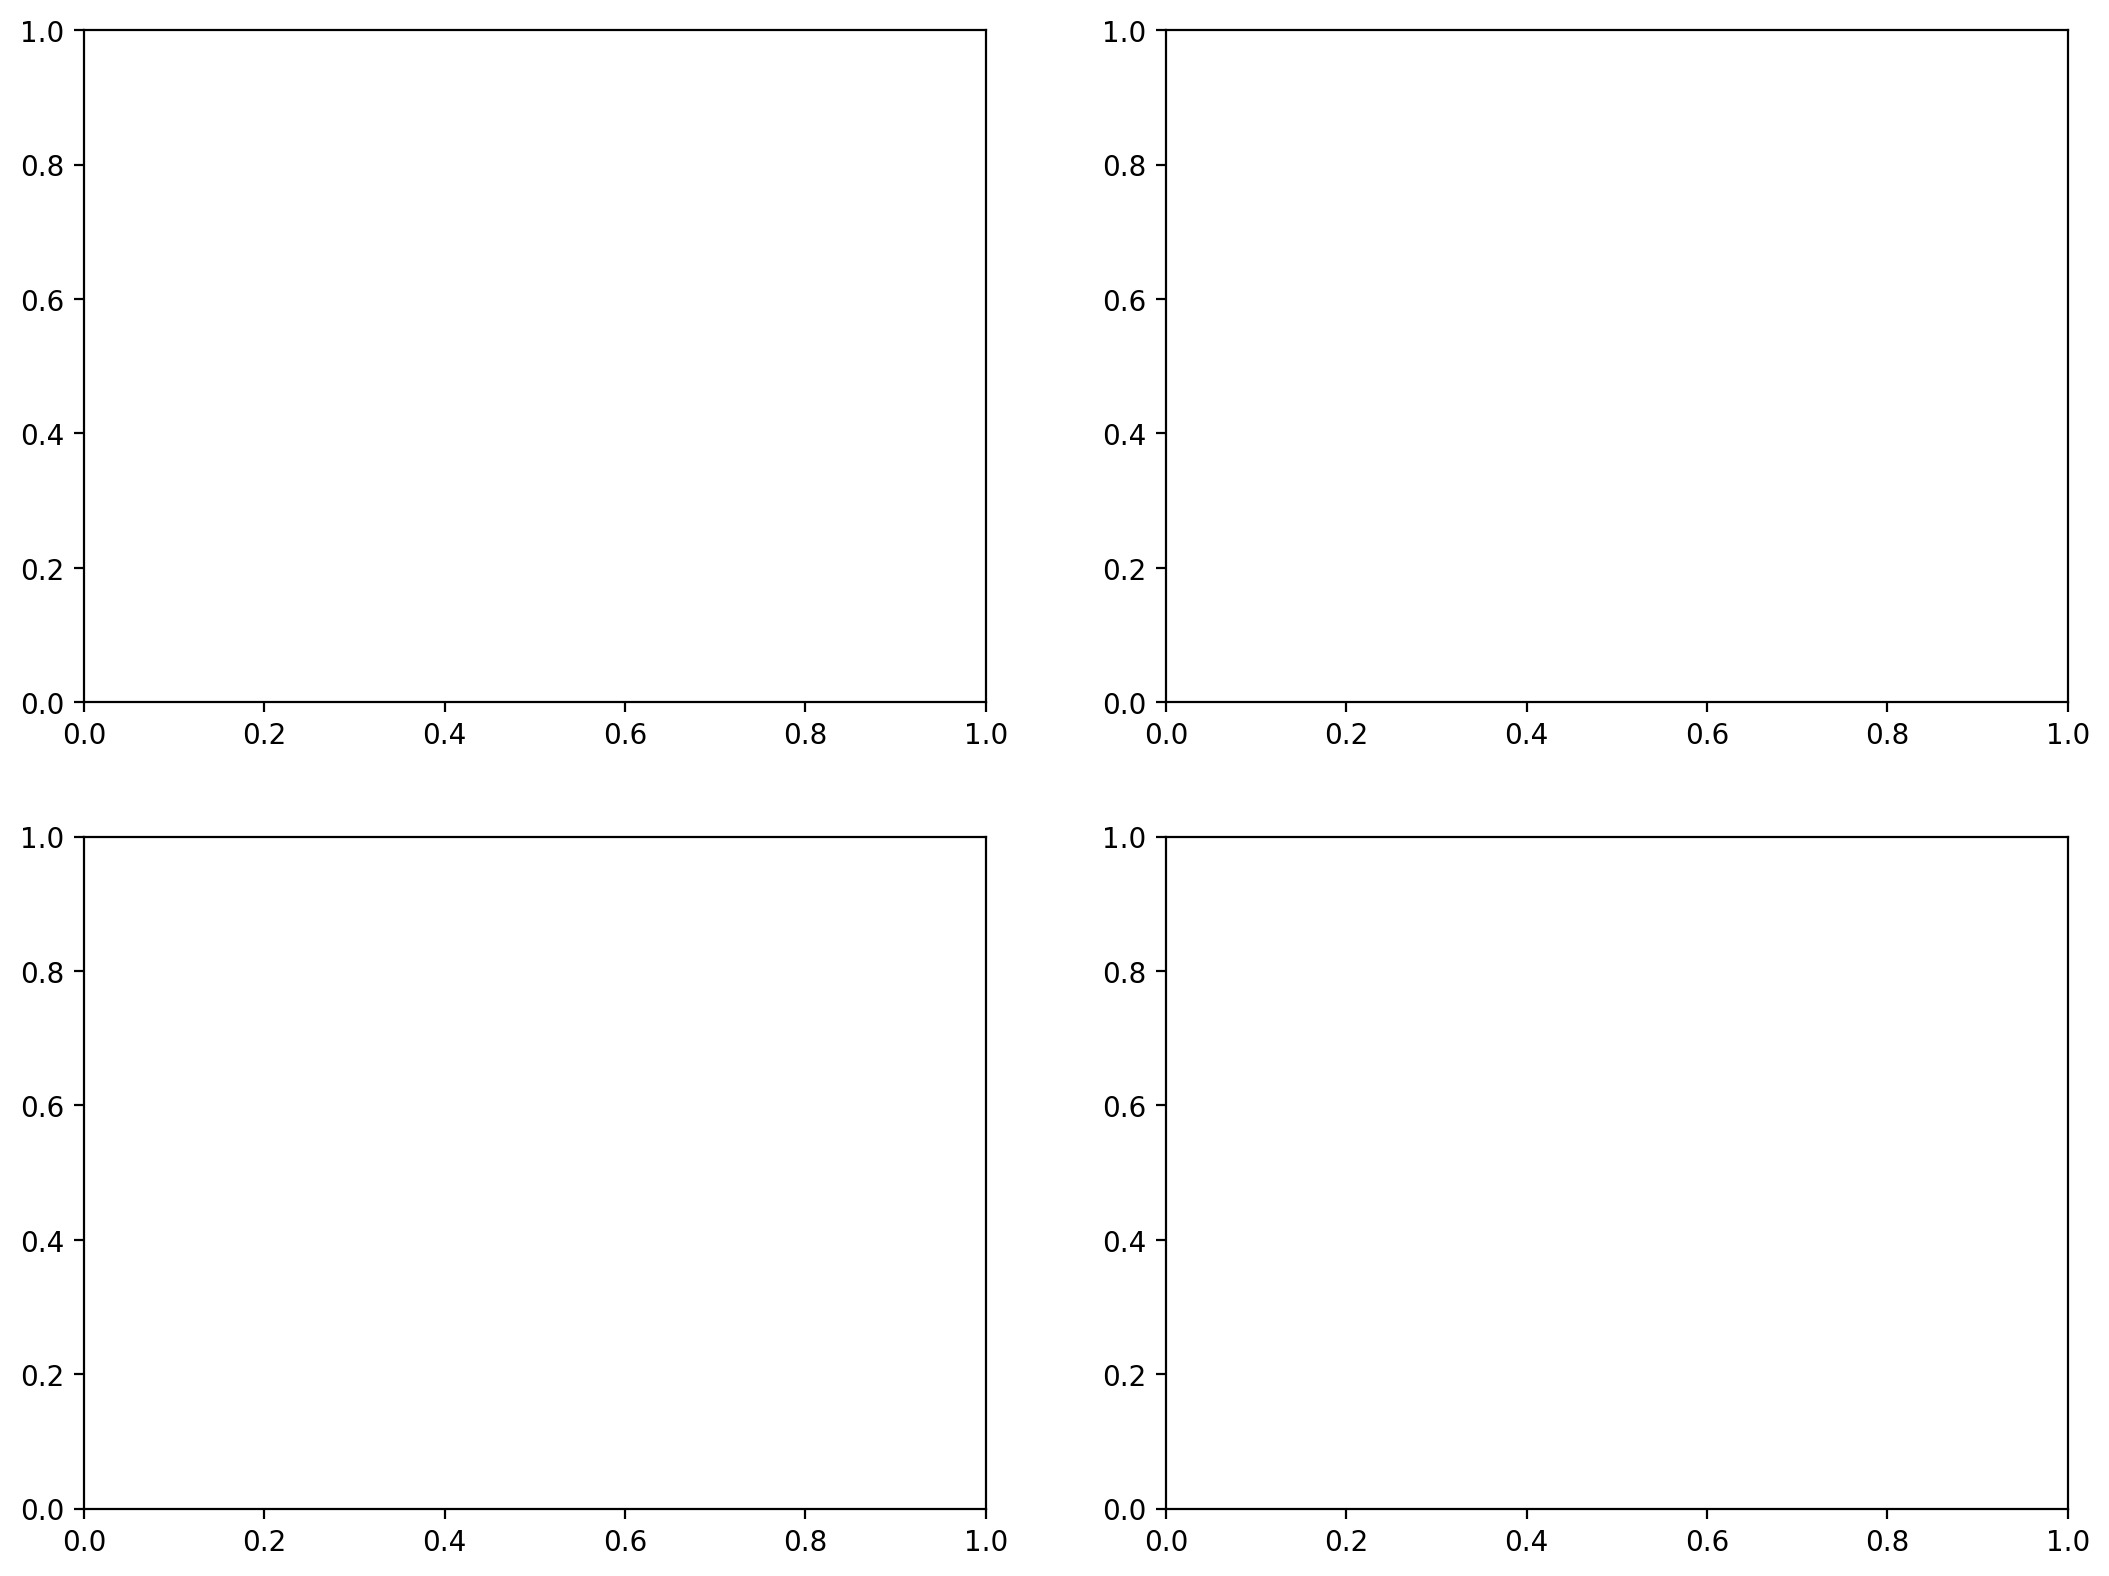

In [173]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(12.8,9.6))

In [106]:
import math

In [107]:
def mean_wtime(x):
    temp = x[-200:,:]
    result = np.mean(temp,axis=0)
    return result
m = 6
df,rdf = df_sets[m],rdf_sets[m]
mtheta_df = df.theta_s.apply(mean_wtime)
mtheta_rdf = rdf.theta_s.apply(mean_wtime)

In [108]:
m = 6
df = df_sets[m]
rdf = rdf_sets[m]
data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
max_std = np.argmax(data_std)
min_std = np.argmin(data_std)
print(Ks[max_std],Ks[min_std])


4.3 11.5


In [184]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist}/')
def Draw_Kr(m,ax):
    df = df_sets[m]
    rdf = rdf_sets[m]
    data_rs = [np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_std = [np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rrs = [np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    data_rstd = [np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))]
    categories = ['Theoretical', 'Simulated']
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    plt.sca(ax)
    fw,(bw,bwd) = Draw_.total()

    err_fw = plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label=r'Foward($K\uparrow$)')
    err_bw = plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label=r'Backward($K\downarrow$)')
    p5, = plt.plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
    p7, = plt.plot([0],  marker='None',
           linestyle='None', label='dummy-empty')
    
    leg3 = plt.legend([p5, fw, err_fw, p5, bw, err_bw],
                      [r'Foward($K\uparrow$)'] + categories + [r'Backward($K\downarrow$)'] + categories,
                      loc = 4,ncol=2) # Two columns, vertical group labels
#     leg4 = plt.legend([p5, p7, p5, p7, fw, err_fw, bw, err_bw],
#               [r'Foward($K\uparrow$)', '', r'Backward($K\downarrow$)', ''] + categories + categories,
#               loc=4, ncol=2) # Two columns, horizontal group labels
    
    plt.grid()

    plt.xlim(0,13)
    plt.ylim(0,1)

    plt.xlabel('Coupling constant(K)',fontsize=13)
    plt.ylabel('Order parameter(r)',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)
def make_sinij(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-200:,:]
        result = np.mean(temp,axis=0)
        return result
    def last(x):
        temp = x[-1,:]
        # result = np.mean(temp,axis=0)
        return temp
    plt.sca(ax)
    df = df_sets[m]
    # mtheta_df = df.theta_s.apply(mean_wtime)
    mtheta_df = df.theta_s.apply(last)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',aspect='auto')
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel('i-th oscillator',fontsize=15)
    plt.ylabel('j-th oscillator',fontsize=15)
    # plt.title(f'K = {Ks[K_idx]}',fontsize=18)
    div = make_axes_locatable(ax)
    cax = div.append_axes("right", size="2%", pad=0.05)
    cbar = fig.colorbar(im, cax=cax)
    cbar.set_ticks([-1,0,1])
    cbar.set_label(r'$\sin(\theta_j-\theta_i)$')
def make_sinij_nocbar(m,K_idx,ax):
    def mean_wtime(x):
        temp = x[-200:,:]
        result = np.mean(temp,axis=0)
        return result
    def last(x):
        temp = x[-1,:]
        # result = np.mean(temp,axis=0)
        return temp
    plt.sca(ax)
    df = df_sets[m]
    # mtheta_df = df.theta_s.apply(mean_wtime)
    mtheta_df = df.theta_s.apply(last)
    seg_theta = mtheta_df.iloc[K_idx]
    i,j = np.meshgrid(seg_theta,seg_theta)
    im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic',origin='lower',aspect='auto')
    plt.xticks([0,500])
    plt.yticks([0,500])
    plt.xlabel('i-th oscillator',fontsize=15)
    plt.ylabel('j-th oscillator',fontsize=15)

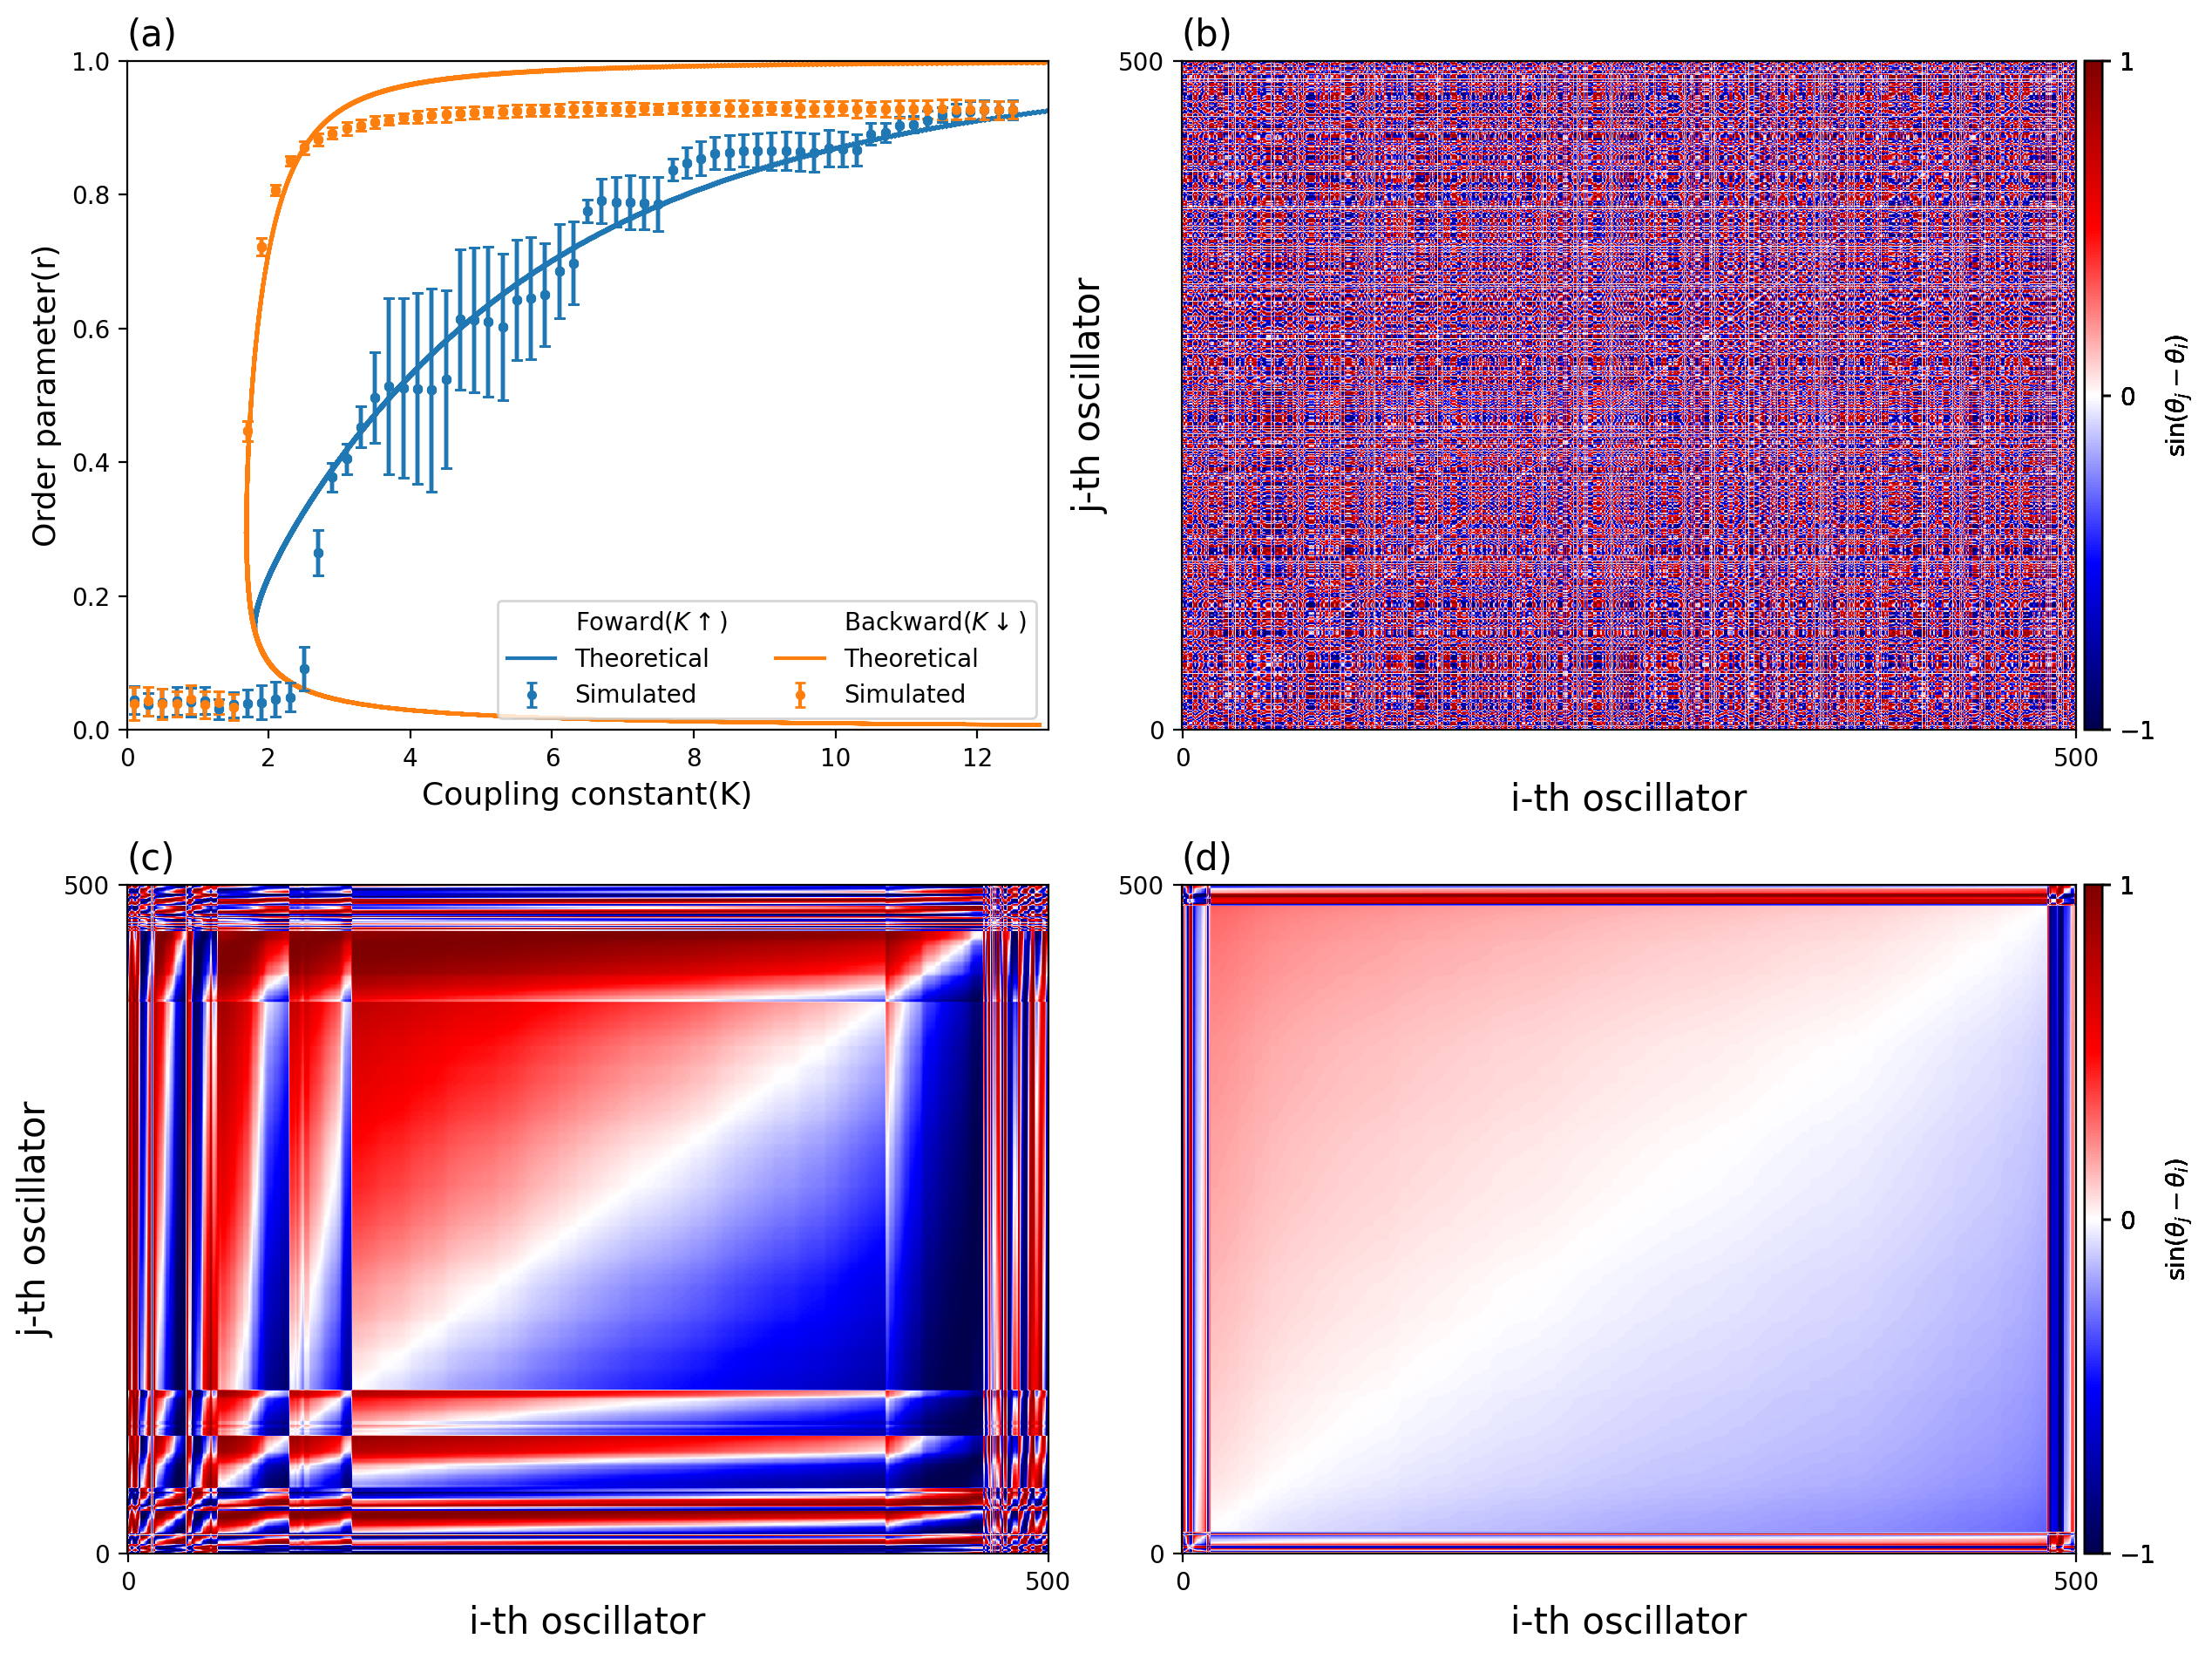

In [185]:
Draw_Kr(m,ax1)
make_sinij(m,0,ax2)
make_sinij_nocbar(m,max_std,ax3)
make_sinij(m,min_std,ax4)
ax4.set_ylabel('')
ax1.set_title('(a)',fontsize=15,loc='left')
ax2.set_title('(b)',fontsize=15,loc='left')
ax3.set_title('(c)',fontsize=15,loc='left')
ax4.set_title('(d)',fontsize=15,loc='left')
plt.tight_layout()
fig

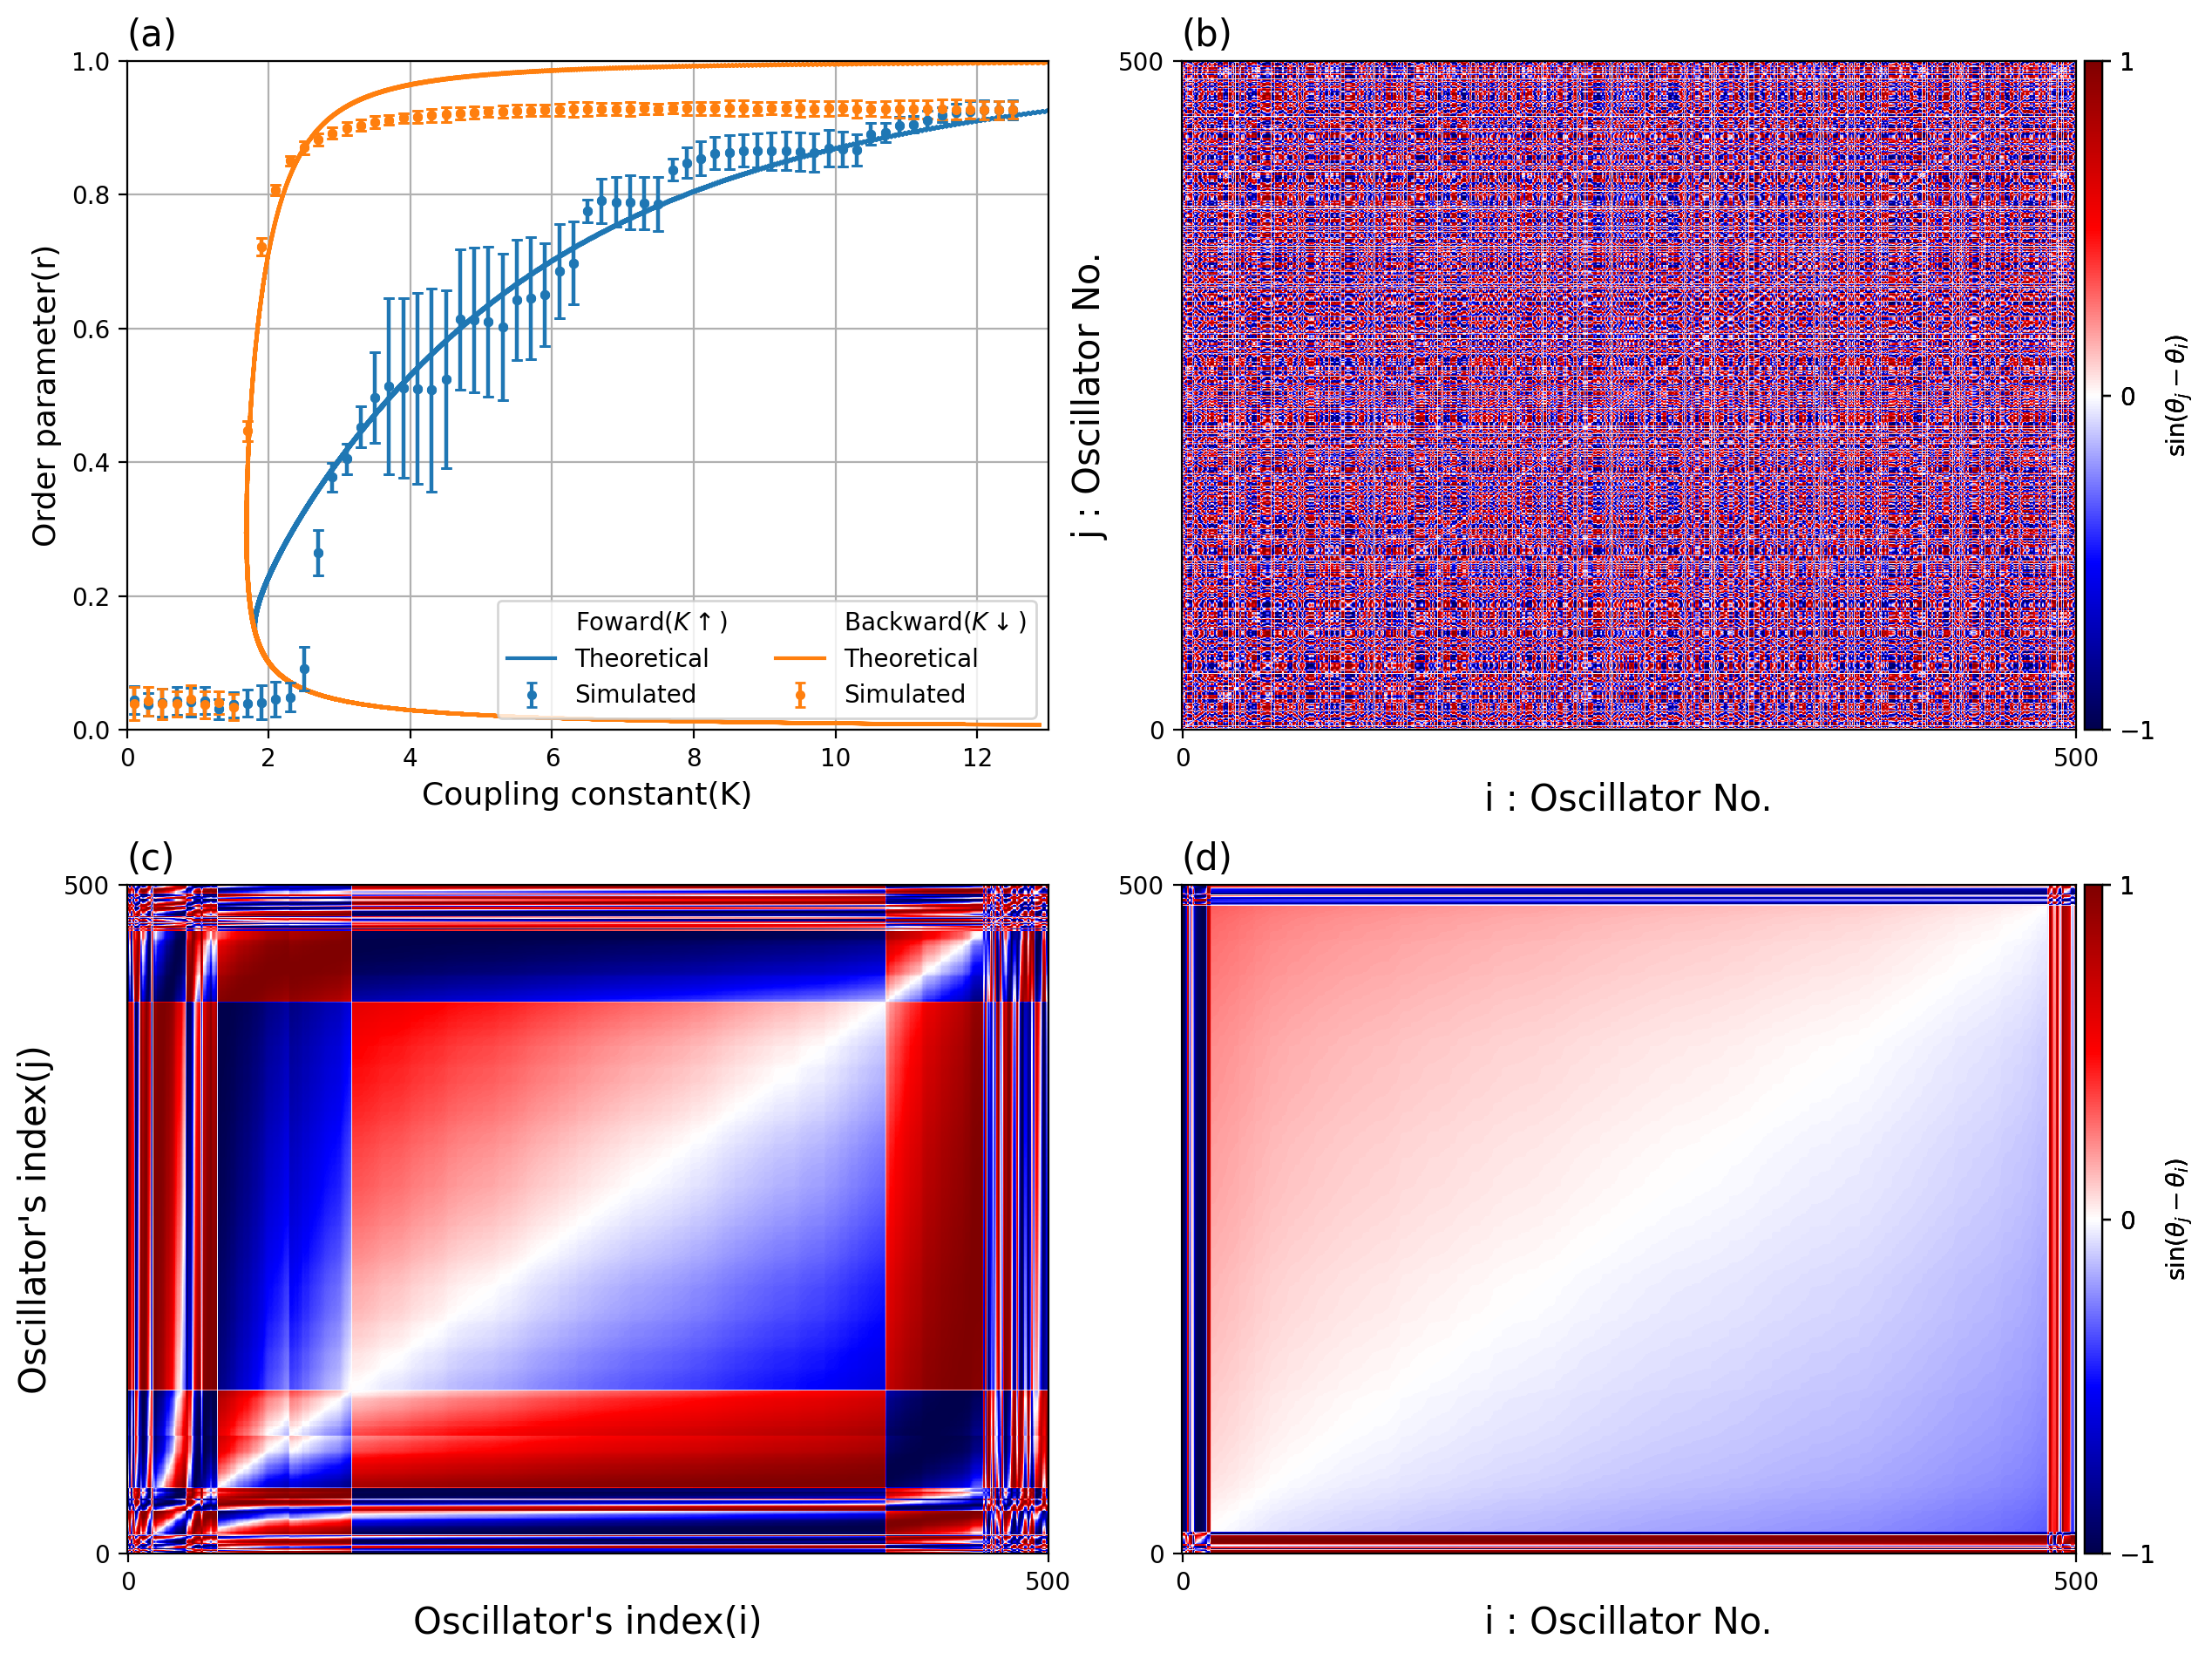

In [179]:
ax1.set_title('(a)',fontsize=15,loc='left')
ax2.set_title('(b)',fontsize=15,loc='left')
ax3.set_title('(c)',fontsize=15,loc='left')
ax4.set_title('(d)',fontsize=15,loc='left')
plt.tight_layout()
fig

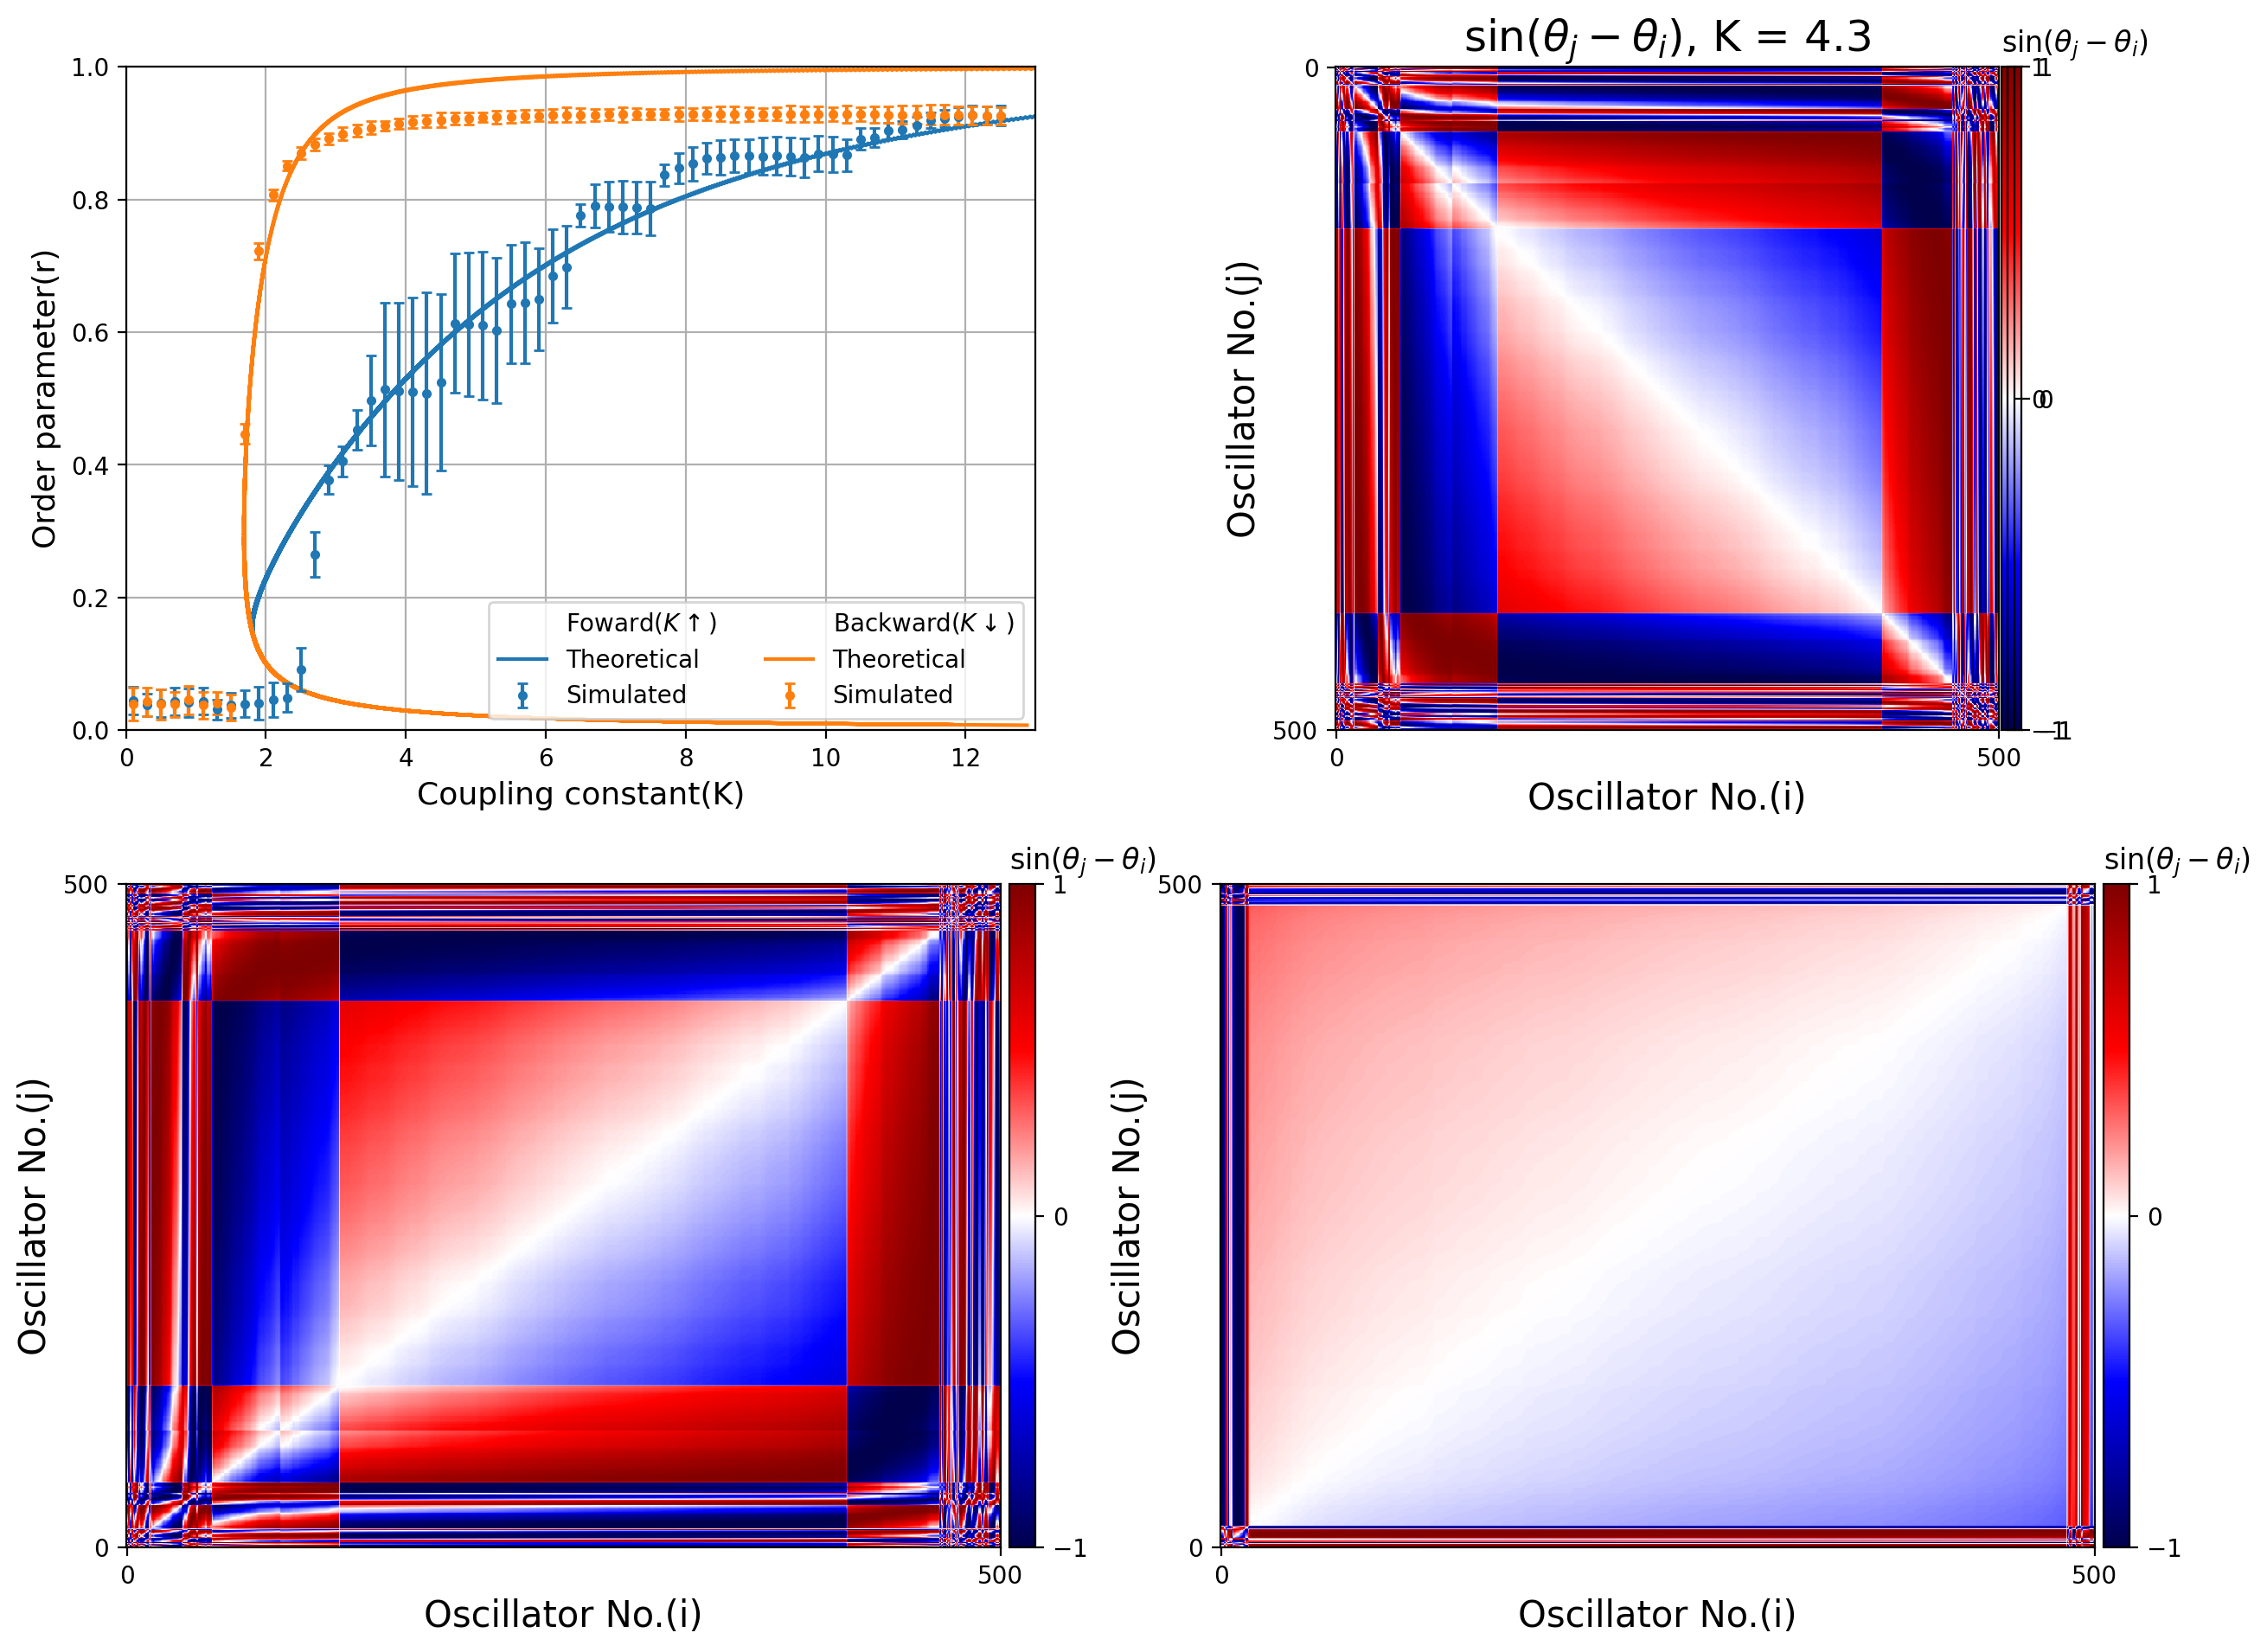

In [130]:
seg_theta = mtheta_df.iloc[max_std]
i,j = np.meshgrid(seg_theta,seg_theta)
plt.sca(ax2)
im = plt.imshow(np.sin(j-i),vmin=-1,vmax=1,cmap = 'seismic')

plt.xticks([0,500])
plt.yticks([0,500])
plt.xlabel('Oscillator No.(i)',fontsize=15)
plt.ylabel('Oscillator No.(j)',fontsize=15)
plt.title(r'$\sin(\theta_j- \theta_i)$'+f', K = {Ks[max_std]}',fontsize= 18)
div = make_axes_locatable(ax2)
cax = div.append_axes("right", size="1%", pad=0.05)
colorbar = fig.colorbar(im, cax=cax)
colorbar.set_ticks([-1,0,1])
fig

In [104]:
%config InlineBackend.figure_format = 'retina'
# up = math.ceil(len(Ks)/10)
# fig, axs = plt.subplots(up,10, sharex='col', sharey='row',figsize=(8.5,10*up/10))

num = 0
for ax_ in axs:
    for ax in ax_:
        seg_theta = mtheta_rdf.iloc[num]
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
        i,j = np.meshgrid(seg_theta,seg_theta)
        im = ax.imshow(np.sin(i-j),vmin=-1,vmax=1,cmap = 'seismic')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'K = {Ksr[num]}',fontsize=8)
        num +=1
        if len(Ks)==num: break


# divider2 = make_axes_locatable(axs.ravel().tolist())
# cax = divider2.append_axes("bottom", size="1%", pad=0.05)
    # cax.axis('off')
# colorbar =fig.colorbar(im, ax=axs.ravel().tolist(),orientation="horizontal")
# colorbar.set_ticks([-1,0,1])
# colorbar.set_label(r'$\sin(\theta_i-\theta_j)$')

fig.suptitle(f'm = {m},'+ r'$\sin(\theta_i- \theta_j)$',fontsize=15,y=0.99)
fig.tight_layout()
plt.savefig(DF+f'{dist}/m = {m}, dK = {dK},backward sin(thetai- thetaj).png',dpi=400)


NameError: name 'axs' is not defined

In [ ]:
ax =plt.errorbar([0])

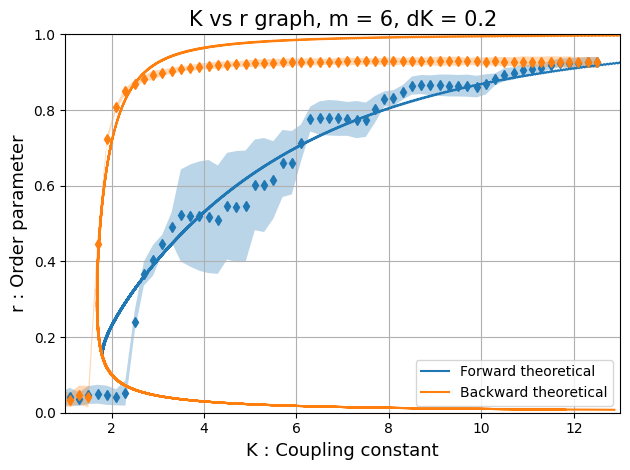

In [ ]:
ST = 50
Ks = df.index
Ksr = rdf.index
Create_Folder(DF+f'{dist}/')
for m in ms:
    df = df_sets[m]
    rdf = rdf_sets[m]
    plt.figure(facecolor='white')
    data_rs = np.array([np.mean(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
    data_std = np.array([np.std(df.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
    data_rrs = np.array([np.mean(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
    data_rstd = np.array([np.std(rdf.rs.iloc[i][-ST*10:]) for i in range(len(Ks))])
    Draw_ = DD(m=m,dist='Normal')
    # Draw_ = DDD(m=m)
    Draw_.total()
    plt.plot(Ks,data_rs,'d',markersize=5)
    plt.plot(Ksr,data_rrs,'d',markersize=5)
    # plt.errorbar(Ks,data_rs,data_std,fmt='.',color='tab:blue',capsize=2,label='Foward(Blue,K growth)')
    plt.fill_between(Ks,data_rs-data_std,data_rs+data_std,alpha=0.3)
    plt.fill_between(Ksr,data_rrs-data_rstd,data_rrs+data_rstd,alpha=0.3)
    # plt.errorbar(Ksr,data_rrs,data_rstd,fmt='.',color='tab:Orange',capsize=2,label='Backward(Orange,K decrese)')

    # plt.plot(Ks,data_rs,'.',label=r"$Forward$",markersize=6,color = 'Tab:Blue',)
    # plt.plot(Ksr,data_rrs,'.',label=r"$Backward$",markersize=6,color = 'Tab:Orange',)
    plt.legend()  
    plt.title(f'K vs r graph, m = {m}, dK = {dK}',fontsize= 15)
    plt.grid()

    plt.xlim(1,13)
    plt.ylim(0,1)

    plt.xlabel('K : Coupling constant',fontsize=13)
    plt.ylabel('r : Order parameter',fontsize=13)
    plt.tight_layout()
    # plt.savefig(DF+f'{dist}/m = {m}, dK = {dK}, K vs r graph.png',dpi=400)

In [27]:
[r'$D_{etc}$'] + categories + [r'$A_{etc}$'] + categories

['$D_{etc}$',
 'simulated',
 'calculated',
 '$A_{etc}$',
 'simulated',
 'calculated']

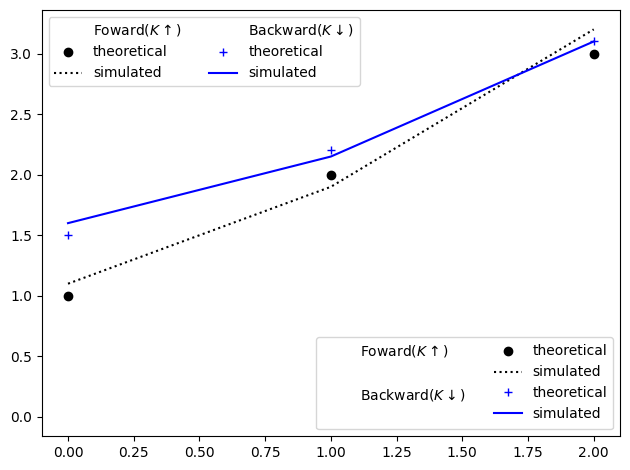

In [10]:
# Separate headings for D and A lines:

from matplotlib.pyplot import *
ds = [1,2,3]
dc = [1.1, 1.9, 3.2]
asim = [1.5, 2.2, 3.1]
ac = [1.6, 2.15, 3.1]

categories = ['theoretical', 'simulated']

p1, = plot(ds, 'ko', label='D simulated')
p2, = plot(dc, 'k:', label='D calculated')
p3, = plot(asim, 'b+', label='A simulated')
p4, = plot(ac, 'b-', label='A calculated')
p5, = plot([0], marker='None',
           linestyle='None', label='dummy-tophead')
p7, = plot([0],  marker='None',
           linestyle='None', label='dummy-empty')

leg3 = legend([p5, p1, p2, p5, p3, p4],
              [r'Foward($K\uparrow$)'] + categories + [r'Backward($K\downarrow$)'] + categories,
              loc=2, ncol=2) # Two columns, vertical group labels
categories = ['theoretical', 'simulated']
p7, = plot([0],  marker='None',
           linestyle='None', label='dummy-empty')
leg4 = legend([p5, p7, p5, p7, p1, p2, p3, p4],
              [r'Foward($K\uparrow$)', '', r'Backward($K\downarrow$)', ''] + categories + categories,
              loc=4, ncol=2) # Two columns, horizontal group labels

gca().add_artist(leg3)

#If there isn't a big empty spot on the plot, two legends:
#leg1 = legend([p1, p2], categories, title='D_etc', loc=0)
#leg2 = legend([p3, p4], categories, title='A_etc', loc=4)
#gca().add_artist(leg2) 
plt.tight_layout()
show()